# Configuración inicial

In [ ]:
# Install dependencies as needed:
!pip install kagglehub[pandas-datasets]

In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Carga del conjunto de datos

In [ ]:
file_path = "Fraudulent_E-Commerce_Transaction_Data_2.csv"

# Load the latest version of the dataset
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "shriyashjagtap/fraudulent-e-commerce-transactions",
  file_path
)

/tmp/ipython-input-3-1554463738.py:4: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


# Análisis exploratorio inicial

In [ ]:
print("Shape del DataFrame:", df.shape)
print("\nResumen de tipos de dato y nulls:")
df.info()

Shape del DataFrame: (23634, 16)

Resumen de tipos de dato y nulls:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23634 entries, 0 to 23633
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction ID      23634 non-null  object 
 1   Customer ID         23634 non-null  object 
 2   Transaction Amount  23634 non-null  float64
 3   Transaction Date    23634 non-null  object 
 4   Payment Method      23634 non-null  object 
 5   Product Category    23634 non-null  object 
 6   Quantity            23634 non-null  int64  
 7   Customer Age        23634 non-null  int64  
 8   Customer Location   23634 non-null  object 
 9   Device Used         23634 non-null  object 
 10  IP Address          23634 non-null  object 
 11  Shipping Address    23634 non-null  object 
 12  Billing Address     23634 non-null  object 
 13  Is Fraudulent       23634 non-null  int64  
 14  Account Age Days    23634 non-null

- Podemos ver que Transaction Date no es Datetime
- Is Fraudulent también se podría transformar en una variable binaria

In [ ]:
display(df.head(5))

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,15d2e414-8735-46fc-9e02-80b472b2580f,d1b87f62-51b2-493b-ad6a-77e0fe13e785,58.09,2024-02-20 05:58:41,bank transfer,electronics,1,17,Amandaborough,tablet,212.195.49.198,Unit 8934 Box 0058\nDPO AA 05437,Unit 8934 Box 0058\nDPO AA 05437,0,30,5
1,0bfee1a0-6d5e-40da-a446-d04e73b1b177,37de64d5-e901-4a56-9ea0-af0c24c069cf,389.96,2024-02-25 08:09:45,debit card,electronics,2,40,East Timothy,desktop,208.106.249.121,"634 May Keys\nPort Cherylview, NV 75063","634 May Keys\nPort Cherylview, NV 75063",0,72,8
2,e588eef4-b754-468e-9d90-d0e0abfc1af0,1bac88d6-4b22-409a-a06b-425119c57225,134.19,2024-03-18 03:42:55,PayPal,home & garden,2,22,Davismouth,tablet,76.63.88.212,"16282 Dana Falls Suite 790\nRothhaven, IL 15564","16282 Dana Falls Suite 790\nRothhaven, IL 15564",0,63,3
3,4de46e52-60c3-49d9-be39-636681009789,2357c76e-9253-4ceb-b44e-ef4b71cb7d4d,226.17,2024-03-16 20:41:31,bank transfer,clothing,5,31,Lynnberg,desktop,207.208.171.73,"828 Strong Loaf Apt. 646\nNew Joshua, UT 84798","828 Strong Loaf Apt. 646\nNew Joshua, UT 84798",0,124,20
4,074a76de-fe2d-443e-a00c-f044cdb68e21,45071bc5-9588-43ea-8093-023caec8ea1c,121.53,2024-01-15 05:08:17,bank transfer,clothing,2,51,South Nicole,tablet,190.172.14.169,"29799 Jason Hills Apt. 439\nWest Richardtown, ...","29799 Jason Hills Apt. 439\nWest Richardtown, ...",0,158,5


In [ ]:
#Estadísticas descriptivas
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Transaction ID,1472952,1472952,d1a811a2-6015-47fa-95e5-0a5282755932,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer ID,1472952,1472952,637d5ed1-a4af-4234-a1d9-a3791b6f1bb6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transaction Amount,1472952.0,NaN,NaN,NaN,226.768309,270.395099,10.0,68.61,151.76,296.05,12701.75
Transaction Date,1472952,1346684,2024-01-27 04:00:16,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Payment Method,1472952,4,credit card,368429,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product Category,1472952,5,health & beauty,295367,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,1472952.0,NaN,NaN,NaN,3.00023,1.414736,1.0,2.0,3.0,4.0,5.0
Customer Age,1472952.0,NaN,NaN,NaN,34.512081,10.003134,-16.0,28.0,35.0,41.0,86.0
Customer Location,1472952,99135,New Michael,1258,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Device Used,1472952,3,mobile,491743,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- **Transaction ID, Customer ID, Shipping address y Billing Address:** son identificadores únicos, no hay duplicados en estas columnas.
No aportan señal directa al modelo.
- **Customer Age:** su mínimo es -2. Debemos manejar las edades negativas.
- **Customer location y IP address:** cuentan con demasiada cardinalidad para ser valores predictivos.

## Duplicados y valores faltantes

In [ ]:
print("Duplicados totales: ", df.duplicated().sum())
print("\nNulos por columna:\n", df.isna().sum())

Duplicados totales:  0

Nulos por columna:
 Transaction ID        0
Customer ID           0
Transaction Amount    0
Transaction Date      0
Payment Method        0
Product Category      0
Quantity              0
Customer Age          0
Customer Location     0
Device Used           0
IP Address            0
Shipping Address      0
Billing Address       0
Is Fraudulent         0
Account Age Days      0
Transaction Hour      0
dtype: int64


Podemos observar que el dataset no cuenta con valores faltantes, por lo cual no se necesita ninguna configuración adicional.

## Distribución de la variable objetivo

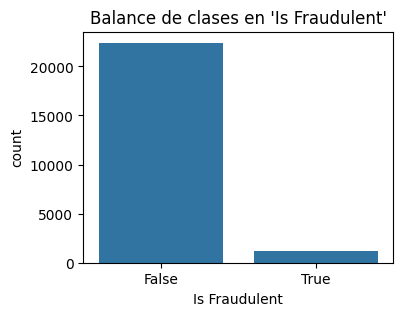


Proporción de fraude:
 Is Fraudulent
False    0.948295
True     0.051705
Name: proportion, dtype: float64


In [ ]:
plt.figure(figsize=(4,3))
sns.countplot(x="Is Fraudulent", data=df)
plt.title("Balance de clases en 'Is Fraudulent'")
plt.show()
print("\nProporción de fraude:\n", df["Is Fraudulent"].value_counts(normalize=True))

solo 5.1 % de las transacciones son fraude. El conjunto de datos tiene un desbalance de clases.

In [ ]:
df["Is Fraudulent"].value_counts()

,count
Is Fraudulent,
False,22412
True,1222


(23634, 13)

## Detección de outliers en variables numéricas

In [ ]:
# Identificar columnas numéricas
numeric_cols = df.select_dtypes(include=np.number).columns
print("\nColumnas numéricas:", list(numeric_cols))


Columnas numéricas: ['Transaction Amount', 'Quantity', 'Customer Age', 'Is Fraudulent', 'Account Age Days', 'Transaction Hour']


### 'Transaction Amount'

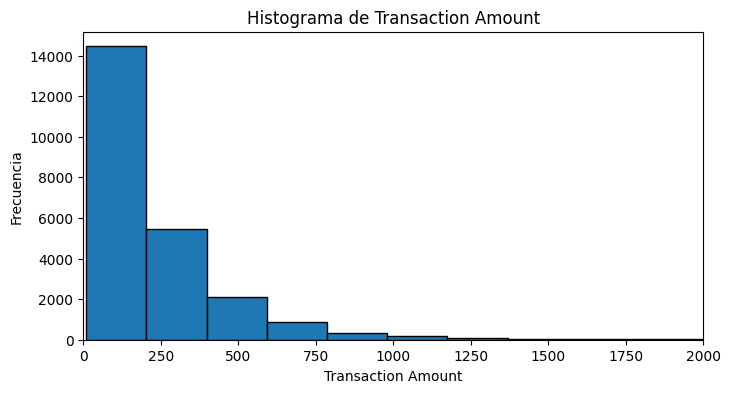

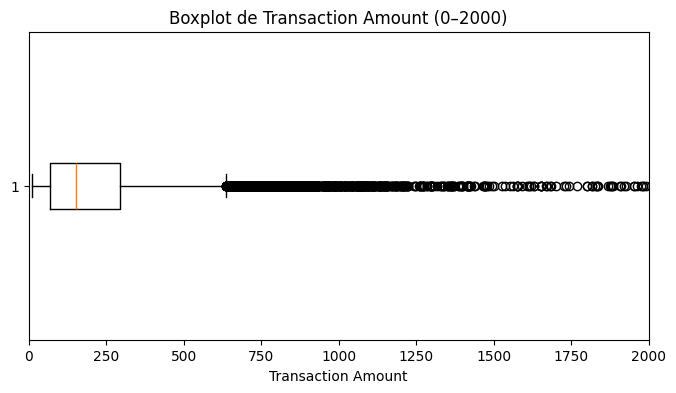

In [ ]:
# Histograma
plt.figure(figsize=(8, 4))
plt.hist(df["Transaction Amount"], bins=50, edgecolor='black')
plt.title("Histograma de Transaction Amount")
plt.xlabel("Transaction Amount")
plt.ylabel("Frecuencia")
plt.xlim(0, 2000)   # opcional: enfocar eje X hasta 2000
plt.show()

# Boxplot
plt.figure(figsize=(8, 4))
plt.boxplot(df["Transaction Amount"], vert=False)
plt.title("Boxplot de Transaction Amount (0–2000)")
plt.xlim(0, 2000)    # Enfocar hasta 2000
plt.xlabel("Transaction Amount")
plt.show()

- El rectángulo (IQR) está prácticamente pegado al 0, lo que indica que el 50 % central de las transacciones son cantidades muy pequeñas.

- Los bigotes (whiskers) también quedan muy cerca de 0, y todos esos círculos fuera de los bigotes son outliers: transacciones de montos muy altos que distorsionan la escala.

- Apoya fuertemente la necesidad de una transformación logarítmica para reducir el efecto de la cola derecha antes de modelar.

### 'Quantity'

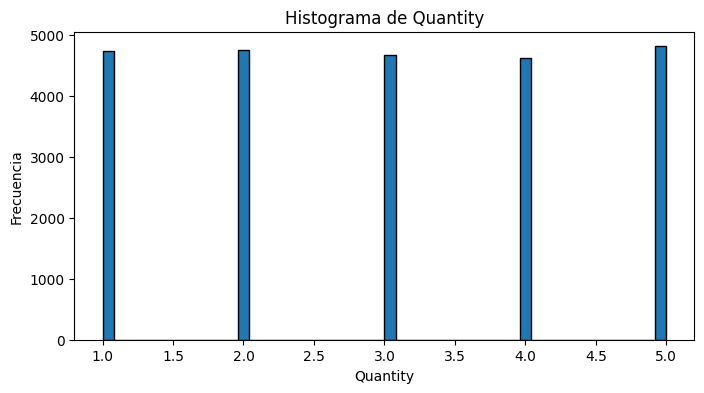

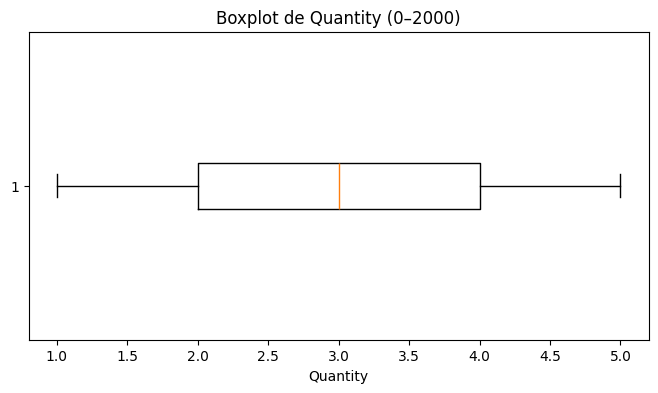

In [ ]:
# Histograma
plt.figure(figsize=(8, 4))
plt.hist(df["Quantity"], bins=50, edgecolor='black')
plt.title("Histograma de Quantity")
plt.xlabel("Quantity")
plt.ylabel("Frecuencia")
plt.show()

# Boxplot
plt.figure(figsize=(8, 4))
plt.boxplot(df["Quantity"], vert=False)
plt.title("Boxplot de Quantity (0–2000)")
plt.xlabel("Quantity")
plt.show()

- La variable 'Quantity' presenta una distribución uniforme dentro de su rango esperado, sin valores atípicos ni picos de frecuencia inusuales. Esto indica que los datos están bien comportados y no requieren tratamiento adicional

### 'Customer Age'

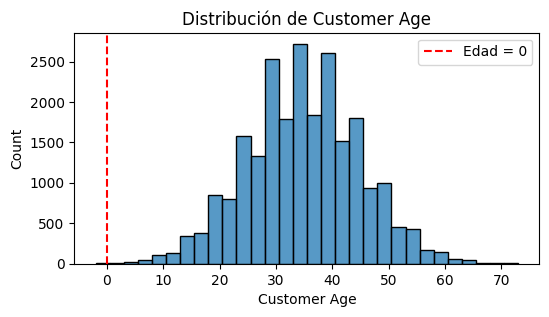

Hay 1 registros con edad negativa


In [ ]:
plt.figure(figsize=(6,3))
sns.histplot(df["Customer Age"], bins=30)
plt.axvline(0, color="r", linestyle="--", label="Edad = 0")
plt.title("Distribución de Customer Age")
plt.legend()
plt.show()

neg_count = (df["Customer Age"] < 0).sum()
print(f"Hay {neg_count} registros con edad negativa")

- Aparte de tener un valor negativo, los valores de “0” son inesperados (¿bebés?).

- Se debería investigar esos ceros: ¿son valores faltantes codificados, outliers o clientes reales?

- También se debería investigar las edades menores a 10. ¿Tiene sentido que personas con dichas edades realicen transacciones?

### 'Account Age Days'

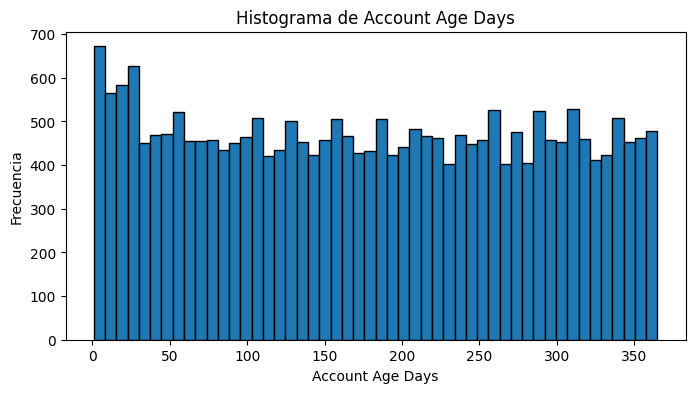

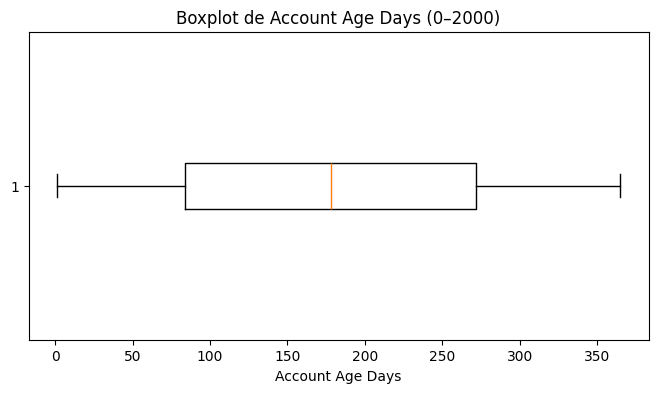

In [ ]:
# Histograma
plt.figure(figsize=(8, 4))
plt.hist(df["Account Age Days"], bins=50, edgecolor='black')
plt.title("Histograma de Account Age Days")
plt.xlabel("Account Age Days")
plt.ylabel("Frecuencia")
plt.show()

# Boxplot
plt.figure(figsize=(8, 4))
plt.boxplot(df["Account Age Days"], vert=False)
plt.title("Boxplot de Account Age Days (0–2000)")
plt.xlabel("Account Age Days")
plt.show()

- La variable 'Account Age Days' presenta una distribución uniforme dentro de su rango esperado, sin valores atípicos ni picos de frecuencia inusuales. Esto indica que los datos están bien comportados y no requieren tratamiento adicional

### 'Transaction Hour'

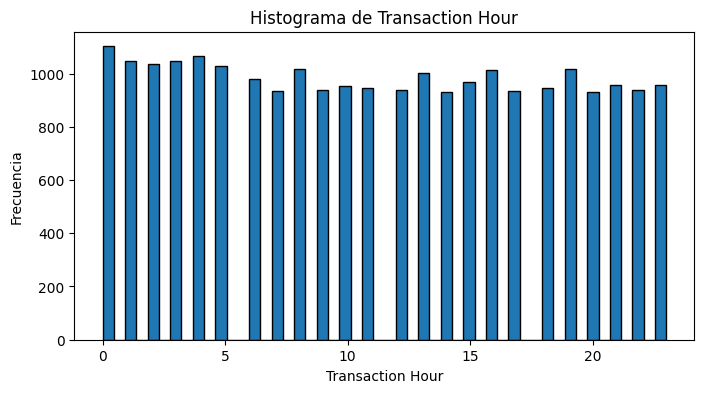

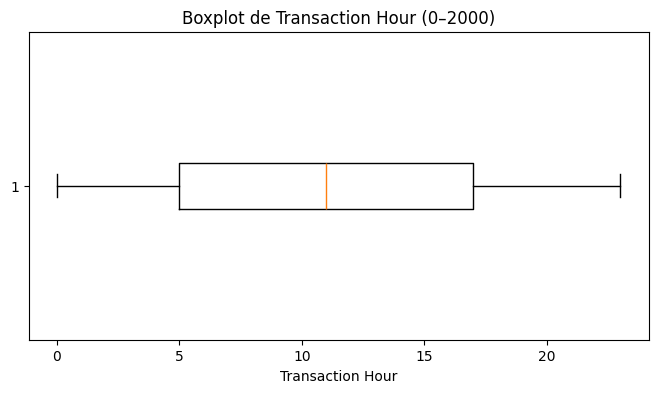

In [ ]:
# Histograma
plt.figure(figsize=(8, 4))
plt.hist(df["Transaction Hour"], bins=50, edgecolor='black')
plt.title("Histograma de Transaction Hour")
plt.xlabel("Transaction Hour")
plt.ylabel("Frecuencia")
plt.show()

# Boxplot
plt.figure(figsize=(8, 4))
plt.boxplot(df["Transaction Hour"], vert=False)
plt.title("Boxplot de Transaction Hour (0–2000)")
plt.xlabel("Transaction Hour")
plt.show()

La variable 'Transaction Hour' presenta una distribución uniforme dentro de su rango esperado, sin valores atípicos ni picos de frecuencia inusuales. Esto indica que los datos están bien comportados y no requieren tratamiento adicional

## Variables categóricas

In [ ]:
# Revisar cuáles variables son categóricas
categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns

print("\nColumnas categóricas:", list(categorical_cols))


Columnas categóricas: ['Transaction ID', 'Customer ID', 'Transaction Date', 'Payment Method', 'Product Category', 'Customer Location', 'Device Used', 'IP Address', 'Shipping Address', 'Billing Address']


### 'Payment Method'

/tmp/ipython-input-16-1313334118.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Payment Method', data=df, order=payment_method_counts.index, palette='viridis')


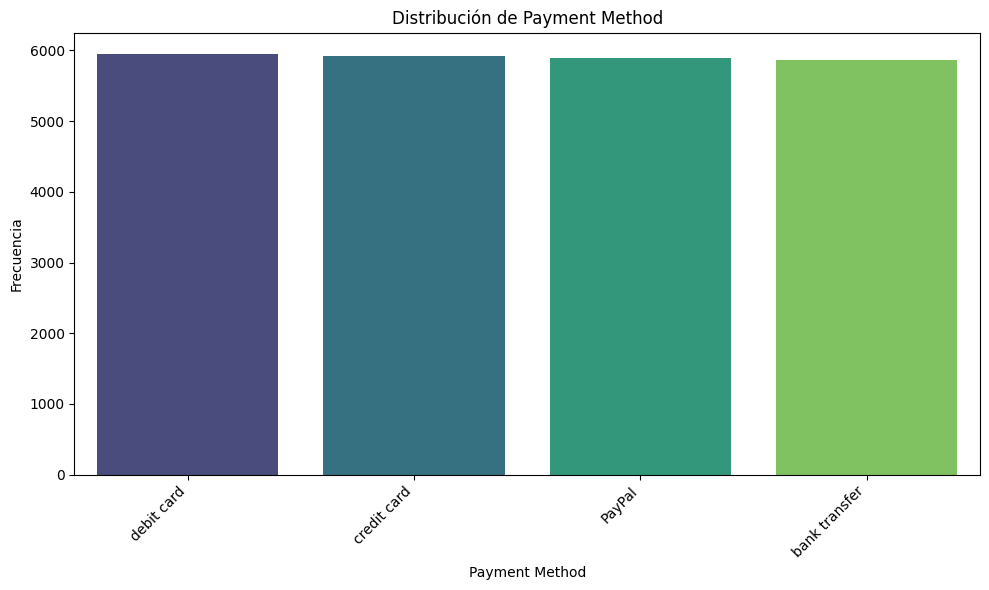

In [ ]:
# Obtener el conteo de cada método de pago
payment_method_counts = df['Payment Method'].value_counts()

#Histograma
plt.figure(figsize=(10, 6))
sns.countplot(x='Payment Method', data=df, order=payment_method_counts.index, palette='viridis')
plt.title('Distribución de Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

- La variable 'Payment Method' presenta una distribución bastante uniforme de sus 4 categorías.

### 'Product Category'

/tmp/ipython-input-17-3907593115.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Product Category', data=df, order=payment_method_counts.index, palette='viridis')


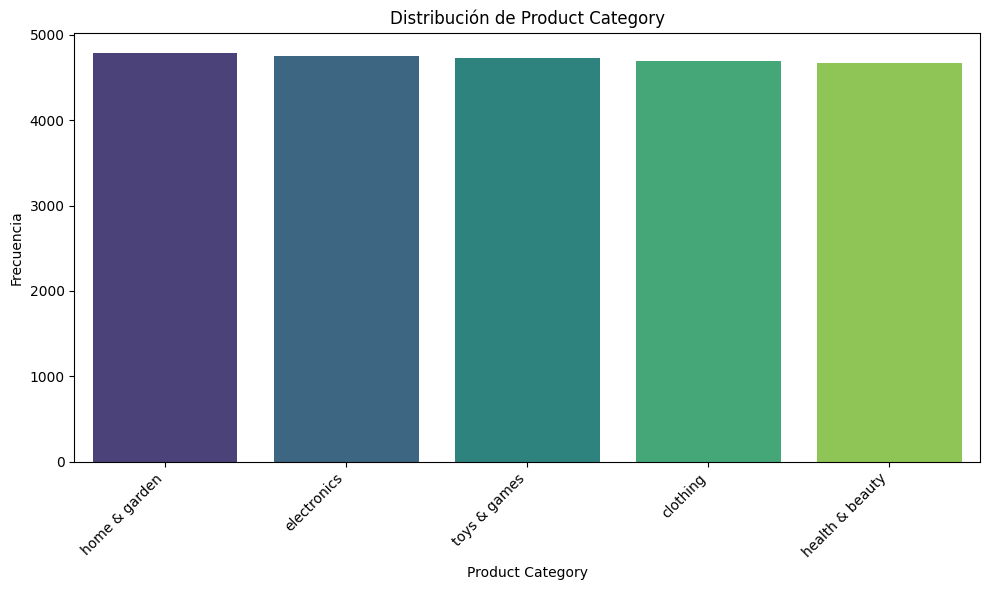

In [ ]:
# Obtener el conteo de cada método de pago
payment_method_counts = df['Product Category'].value_counts()

#Histograma
plt.figure(figsize=(10, 6))
sns.countplot(x='Product Category', data=df, order=payment_method_counts.index, palette='viridis')
plt.title('Distribución de Product Category')
plt.xlabel('Product Category')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

- La variable 'Product Category' presenta una distribución bastante uniforme de sus 5 categorías.

### 'Device used'

/tmp/ipython-input-18-283021048.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Device Used', data=df, order=payment_method_counts.index, palette='viridis')


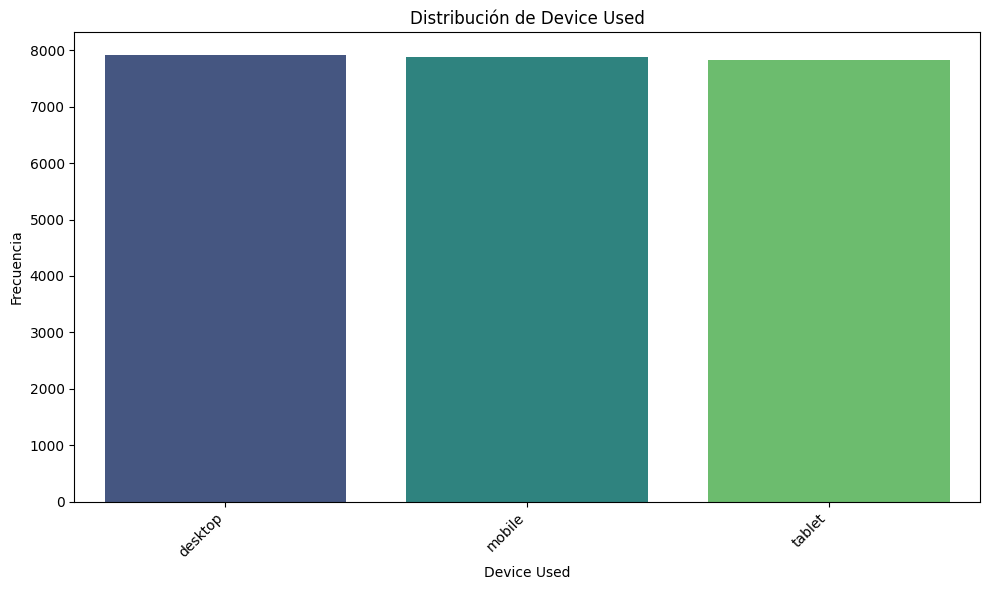

In [ ]:
# Obtener el conteo de cada método de pago
payment_method_counts = df['Device Used'].value_counts()

#Histograma
plt.figure(figsize=(10, 6))
sns.countplot(x='Device Used', data=df, order=payment_method_counts.index, palette='viridis')
plt.title('Distribución de Device Used')
plt.xlabel('Device Used')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

- La variable 'Device Used' presenta una distribución bastante uniforme de sus 3 categorías.

# Limpieza de datos

## Valores negativos y significativamente pequeños en 'Customer Age'

In [ ]:
#Valores negativos en variable de edad

neg = (df["Customer Age"] < 0).sum()
print(f"Hay {neg} registros con edad negativa")

# _Cuenta la frecuencia de las edades negativas
neg_age_counts = df.loc[df["Customer Age"] < 0, "Customer Age"].value_counts()

print(neg_age_counts)

Hay 1 registros con edad negativa
Customer Age
-2    1
Name: count, dtype: int64


Ya que solo tenemos un valor negativo y su valor absoluto está dentro del rango de edades, vamos a cambiarlo por dicho valor.

In [ ]:
# Convierte las edades negativas en su valor absoluto
mask = df["Customer Age"] < 0
df.loc[mask, "Customer Age"] = df.loc[mask, "Customer Age"].abs()

neg = (df["Customer Age"] < 0).sum()
print(f"Hay {neg} registros con edad negativa después de corregir")

Hay 0 registros con edad negativa después de corregir


In [ ]:
df.columns

Index(['Transaction ID', 'Customer ID', 'Transaction Amount',
       'Transaction Date', 'Payment Method', 'Product Category', 'Quantity',
       'Customer Age', 'Customer Location', 'Device Used', 'IP Address',
       'Shipping Address', 'Billing Address', 'Is Fraudulent',
       'Account Age Days', 'Transaction Hour'],
      dtype='object')

Dado que en el dataset se encuentran datos inferiores a 14 años y la edad mínima comúnmente es de 14 años para poder abrir una cuenta bancaria, vamso a reemplazar todos los valores entre 0 y 14 con la mediana de los datos entre

In [ ]:
edades_menores_14 = df[df['Customer Age'] < 14]['Customer Age'].value_counts().sort_index()
edades_menores_14

,count
Customer Age,
0,8
1,4
2,5
3,5
4,9
5,12
6,20
7,26
8,24


In [ ]:
edades_menores_14.sum()

np.int64(433)

Filtramos la el dataset con los datos de edad mayores a 14 y calculamos la mediana:

In [ ]:
# Filtrar las edades mayores o iguales a 14
edades_mayores_14 = df[df['Customer Age'] >= 14]['Customer Age']

# Calcular la mediana de ese subconjunto
mediana_mayores_14 = edades_mayores_14.median()

print(f"Mediana de las edades desde 14 en adelante: {mediana_mayores_14}")

Mediana de las edades desde 14 en adelante: 35.0


Reemplazamos en el df:

In [ ]:
df.loc[df['Customer Age'] < 14, 'Customer Age'] = mediana_mayores_14
df['Customer Age'].min()

14

Ahora la edad mínima de la columna 'Customer Age' es 14.

### 'Payment Method'

/tmp/ipython-input-12-1313334118.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Payment Method', data=df, order=payment_method_counts.index, palette='viridis')


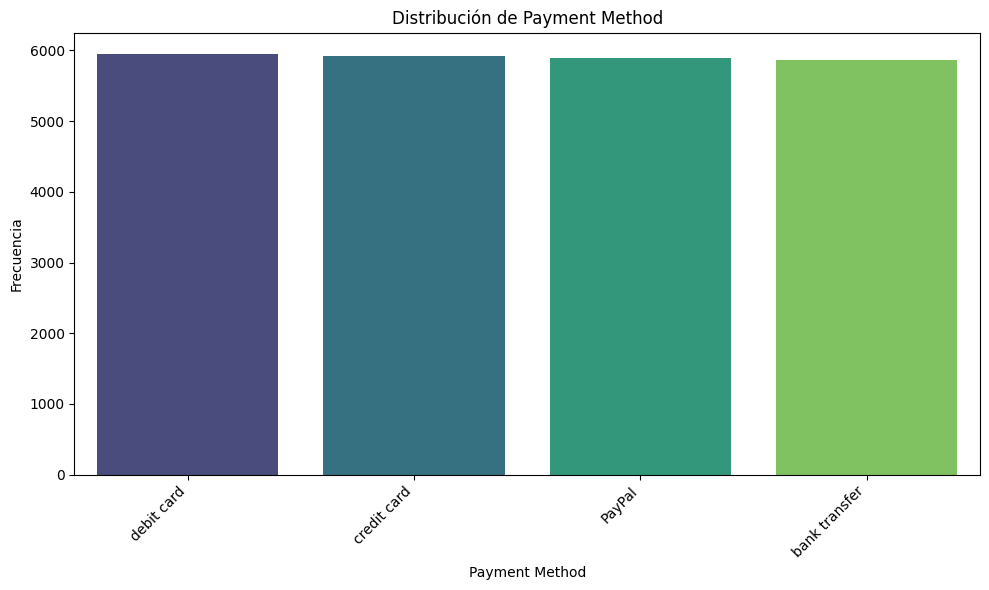

In [ ]:
# Obtener el conteo de cada método de pago
payment_method_counts = df['Payment Method'].value_counts()

#Histograma
plt.figure(figsize=(10, 6))
sns.countplot(x='Payment Method', data=df, order=payment_method_counts.index, palette='viridis')
plt.title('Distribución de Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

- La variable 'Payment Method' presenta una distribución bastante uniforme de sus 4 categorías.

## Cambio de datatypes

### Variable 'Transaction Date'

Necesitamos transformar esta variable de tipo object a datetime.

In [ ]:
df['Transaction Date'] = pd.to_datetime(
    df['Transaction Date'],
    format='%Y-%m-%d %H:%M:%S',
    errors='coerce'    # convierte en NaT cualquier valor mal formado
)

# Verificar
print(df['Transaction Date'].dtype)  # datetime64[ns]
print(df['Transaction Date'].head())

datetime64[ns]
0   2024-03-24 23:42:43
1   2024-01-22 00:53:31
2   2024-01-22 08:06:03
3   2024-01-16 20:34:53
4   2024-01-16 15:47:23
Name: Transaction Date, dtype: datetime64[ns]


### Variable 'Is Fraudulent'

Queremos representar las clases de forma booleana ya que es un problema de clasificación binario

In [ ]:
df['Is Fraudulent'] = df['Is Fraudulent'].astype(bool)

# Verificar
print(df['Is Fraudulent'].dtype)  # datetime64[ns]
print(df['Is Fraudulent'].head())

bool
0    False
1    False
2    False
3    False
4    False
Name: Is Fraudulent, dtype: bool


# Ingeniería de características

## Shipping Address y Billing Address
Estas dos variables son cadenas largas y muy específicas que difícilmente se repiten y no aportan un patrón directo. Mejor quedarnos sólo con el flag de coincidencia entre ambas.



In [ ]:
df["Address Match"] = (df["Shipping Address"] == df["Billing Address"]).astype(bool)

## Split de 'Transaction Date'

Al extraer día, mes y día de la semana de la fecha de transacción, aportamos varias ventajas al modelo:

**Detección de patrones temporales:**

- **Día de la semana:** Pueden existir diferencias claras entre fraude en días laborables vs. fines de semana (por ejemplo, menos vigilancia bancaria el sábado o picos de “ataques” planificados los lunes).

- **Día del mes:** Muchos usuarios cobran o pagan servicios en días fijos (p. ej. 1, 15 o último día), y los estafadores pueden aprovechar esos ciclos. Conocer el día de mes nos ayuda a ver si hay concentración de fraudes en torno a esas fechas.

- **Mes:** El fraude suele aumentar en temporadas como diciembre (vacaciones) o septiembre (comienzo de cursos), y decaer en meses “tranquilos”.

**Mejor capacidad de generalización:**

En lugar de tratar la fecha completa como una variable de alta cardinalidad (lo que llevaría a cientos de valores únicos y “sobreajuste”), dividimos en tres features de bajo rango y le damos al modelo la posibilidad de aprender efectos estacionales de forma más sencilla.

In [ ]:
df['Day'] = df["Transaction Date"].dt.day
df["Day of the week"] = df["Transaction Date"].dt.day_of_week
df["Month"] = df["Transaction Date"].dt.month

## 'Customer Location' y 'IP Address'

Salvo que realicemos un esfuerzo considerable para convertirlas en regiones/países o rangos de IP sospechosos, tienden a generar ruido.

Con ~99 000 valores distintos, “Customer Location” en crudo aporta muy poca señal como categoría nominal. Vamos a optar por eliminar estas dos variabless

Vamos a eliminarlas junto con las columnas que no aportan información.

In [ ]:
df.drop(columns=["Transaction ID", "Customer ID", "Transaction Date", "Customer Location", "IP Address", "Shipping Address", "Billing Address"], inplace=True)

Verificamos los cambios

In [ ]:
df.head()

,Transaction Amount,Payment Method,Product Category,Quantity,Customer Age,Device Used,Is Fraudulent,Account Age Days,Transaction Hour,Address Match,Day,Day of the week,Month
0,42.32,PayPal,electronics,1,40,desktop,False,282,23,True,24,6,3
1,301.34,credit card,electronics,3,35,tablet,False,223,0,True,22,0,1
2,340.32,debit card,toys & games,5,29,desktop,False,360,8,False,22,0,1
3,95.77,credit card,electronics,5,45,mobile,False,325,20,True,16,1,1
4,77.45,credit card,clothing,5,42,desktop,False,116,15,True,16,1,1


In [ ]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Transaction Amount,23634.0,NaN,NaN,NaN,229.367099,282.046669,10.0,69.07,151.415,296.1275,9716.5
Payment Method,23634,4,debit card,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product Category,23634,5,home & garden,4786,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,23634.0,NaN,NaN,NaN,3.00055,1.419663,1.0,2.0,3.0,4.0,5.0
Customer Age,23634.0,NaN,NaN,NaN,35.020437,9.414783,14.0,28.0,35.0,41.0,73.0
Device Used,23634,3,desktop,7923,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Is Fraudulent,23634,2,False,22412,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Account Age Days,23634.0,NaN,NaN,NaN,178.660531,107.388682,1.0,84.0,178.0,272.0,365.0
Transaction Hour,23634.0,NaN,NaN,NaN,11.266015,6.980659,0.0,5.0,11.0,17.0,23.0
Address Match,23634,2,True,21292,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Lo exportamos para iniciar con los preprocesamientos particulares de cada modelo

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23634 entries, 0 to 23633
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction Amount  23634 non-null  float64
 1   Payment Method      23634 non-null  object 
 2   Product Category    23634 non-null  object 
 3   Quantity            23634 non-null  int64  
 4   Customer Age        23634 non-null  int64  
 5   Device Used         23634 non-null  object 
 6   Is Fraudulent       23634 non-null  bool   
 7   Account Age Days    23634 non-null  int64  
 8   Transaction Hour    23634 non-null  int64  
 9   Address Match       23634 non-null  bool   
 10  Day                 23634 non-null  int32  
 11  Day of the week     23634 non-null  int32  
 12  Month               23634 non-null  int32  
dtypes: bool(2), float64(1), int32(3), int64(4), object(3)
memory usage: 1.8+ MB


In [ ]:
df.to_csv('transacciones_procesadas.csv', index=False)